# Class Balancing

## Data Preprocessing & EDA

In [837]:
import pandas as pd

df = pd.read_csv('data/pokemon.csv')

In [838]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [839]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [840]:
df = pd.get_dummies(df, columns=['Type 1', 'Type 2'])

df.drop(['#', 'Name'], axis=1, inplace=True)

df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1_Bug,...,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,318,45,49,49,65,65,45,1,False,0,...,0,0,0,0,0,1,0,0,0,0
1,405,60,62,63,80,80,60,1,False,0,...,0,0,0,0,0,1,0,0,0,0
2,525,80,82,83,100,100,80,1,False,0,...,0,0,0,0,0,1,0,0,0,0
3,625,80,100,123,122,120,80,1,False,0,...,0,0,0,0,0,1,0,0,0,0
4,309,39,52,43,60,50,65,1,False,0,...,0,0,0,0,0,0,0,0,0,0


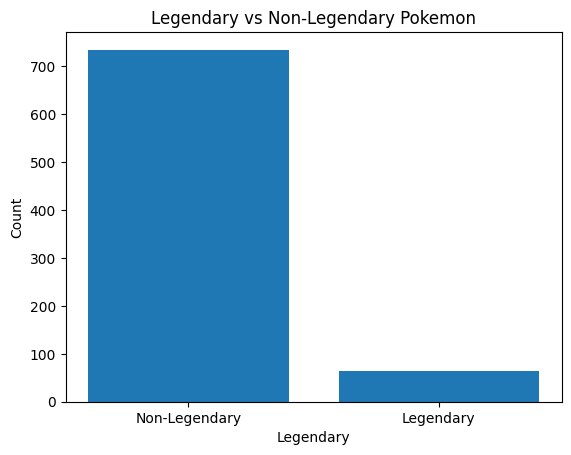

In [841]:
import matplotlib.pyplot as plt

plt.bar(df['Legendary'].unique(), df['Legendary'].value_counts())
plt.xticks([0, 1], ['Non-Legendary', 'Legendary'])
plt.xlabel('Legendary')
plt.ylabel('Count')
plt.title('Legendary vs Non-Legendary Pokemon')
plt.show()

## Model Training

In [842]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {score}')

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Legendary', 'Legendary'])
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

In [843]:
from sklearn.model_selection import train_test_split

X = df.drop('Legendary', axis=1)
y = df['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [844]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

### Without class balancing

Accuracy: 0.945


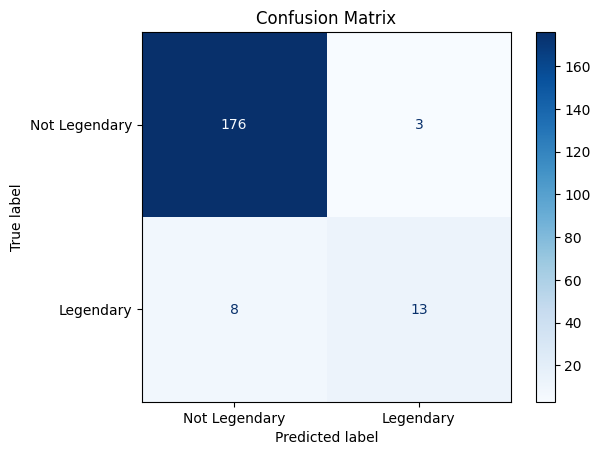

In [845]:
evaluate_model(rf, X_train, X_test, y_train, y_test)

### With Under Sampling

Accuracy: 0.96


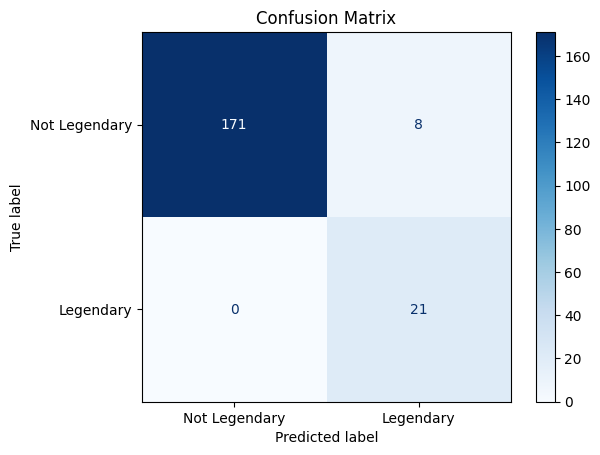

In [846]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

evaluate_model(rf, X_resampled, X_test, y_resampled, y_test)

### With Class Weights

Accuracy: 0.95


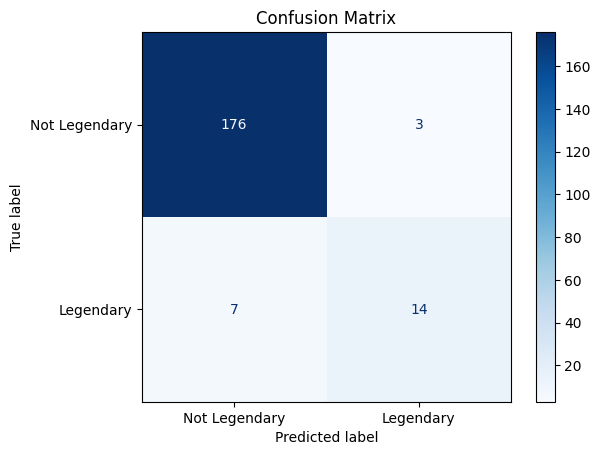

In [847]:
rf_w = RandomForestClassifier(class_weight='balanced')

evaluate_model(rf_w, X_train, X_test, y_train, y_test)

### With Oversampling

In [848]:
train_df, test_df = train_test_split(df)
X_test = test_df.drop('Legendary', axis=1)
y_test = test_df['Legendary']

#### SMOTE

Accuracy: 1.0


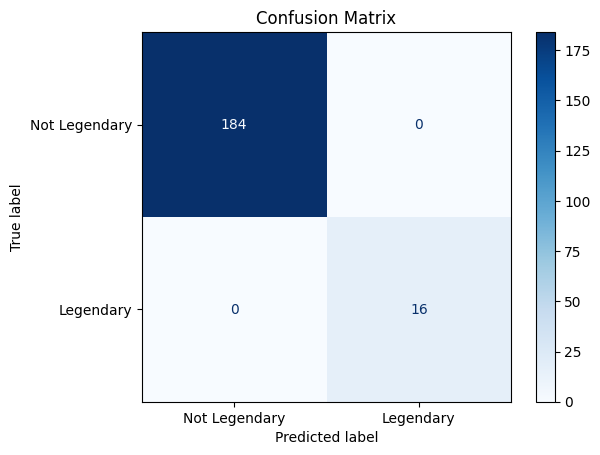

In [849]:
from crucio import SMOTE

smote = SMOTE()

balanced_df = smote.balance(df, 'Legendary')

X_train = balanced_df.drop('Legendary', axis=1)
y_train = balanced_df['Legendary']

evaluate_model(rf, X_train, X_test, y_train, y_test)

#### SMOTEENN

Accuracy: 0.99


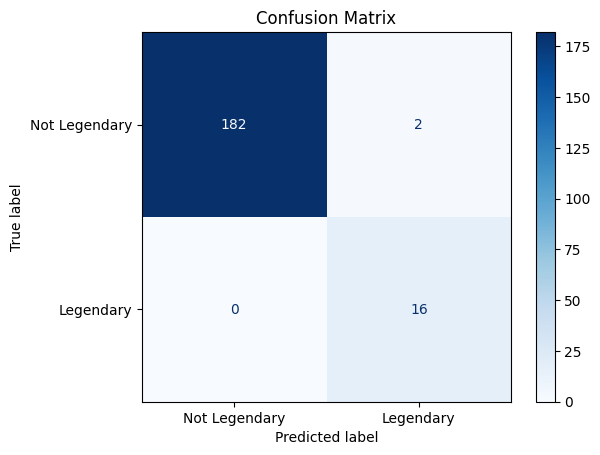

In [850]:
from crucio import SMOTEENN

smoteenn = SMOTEENN()

balanced_df = smoteenn.balance(df, 'Legendary')

X_train = balanced_df.drop('Legendary', axis=1)
y_train = balanced_df['Legendary']

evaluate_model(rf, X_train, X_test, y_train, y_test)

#### ICOTE

Accuracy: 1.0


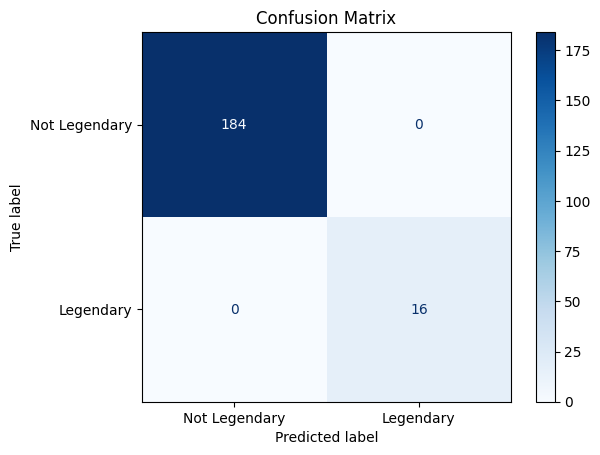

In [851]:
from crucio import ICOTE

icote = ICOTE()
balanced_df = icote.balance(df, 'Legendary')

X_train = balanced_df.drop('Legendary', axis=1)
y_train = balanced_df['Legendary']

evaluate_model(rf, X_train, X_test, y_train, y_test)

#### TKRKNN

Accuracy: 1.0


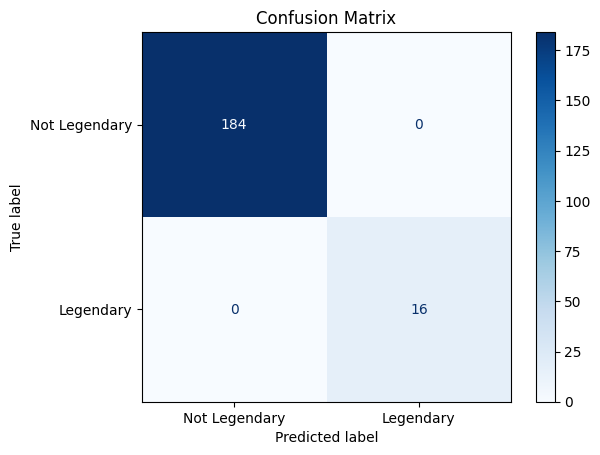

In [852]:
from crucio import TKRKNN

tkrknn = TKRKNN()

balanced_df = tkrknn.balance(df, 'Legendary')

X_train = balanced_df.drop('Legendary', axis=1)
y_train = balanced_df['Legendary']

evaluate_model(rf, X_train, X_test, y_train, y_test)

## Conclusions

For this particular dataset, all class balancing methods help improve the performance of the Random Forest Classifier model. The SMOTE, ICOTE and TKRKNN oversampling algorithms result in the highest accuracy of 100%.

Besides, one hot encoding the categorical variables improved the model performance as well.